#Расчёт потока частиц в детекторе. Учёт скорости плазмы относительно спутника.

Рассматривается случай, когда плазма движется относительно спутника.

Задача:
* Вычислить значения ионного потока для ионов водорода (протонов) для углов:
  * γ = 0
  * γ = 10
  * γ = 20
  * γ = 30
* Все расчеты провести для 3-х значений температур:
  * T = 3 000К,
  * T = 5 000K
  * T = 7 000К
* Для всех вычислений:
  * угол раствора коллиматора α = 5⸰
  * концентрация n=10^3 частиц в м3

Значения k и m взять из справочников.

Скорости плазмы:
  * Vпл = 6 км/c
  * Vпл = 7 км/c
  * Vпл = 8 км/с
  
Результаты привести в виде таблиц.


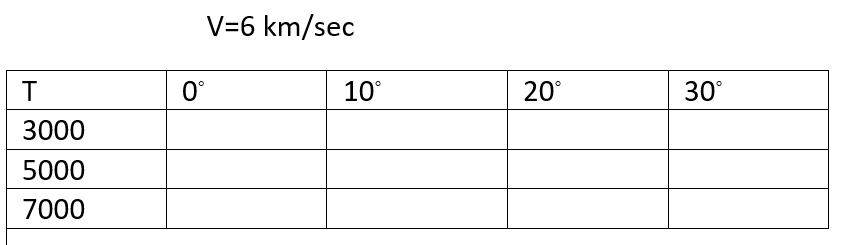

* Нарисовать графики, сгруппировав данные по скоростям плазмы и температурам. По оси х отложить угол, по оси y – потоки в логарифмическом масштабе.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

###Распределение Максвелла (по скоростям)

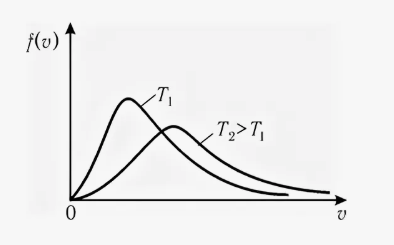

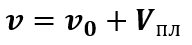

Здесь v, v0, Vпл – вектора скоростей частицы на входе в детектор, частицы в неподвижной плазме и самой плазмы.

Функция распределения Максвелла по модулю скорости (с учётом скорости плазмы)

Здесь v – «микроскорость» частиц, m – масса иона, k – постоянная Больцмана, T – температура в К.

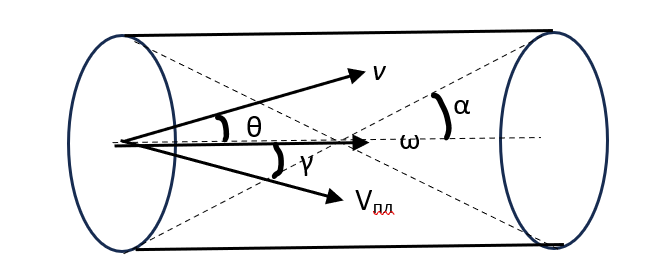

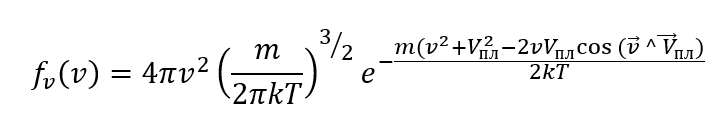

Здесь v – «микроскорость» частиц, ω – направление оси коллиматора, θ – угол между скоростью и осью коллиматора, α – угол раствора коллиматора, γ - угол между осью детектора и направлением вектора скорости плазмы Vпл.

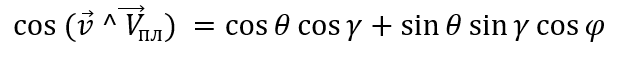

ϕ - угол между плоскостями, содержащими ω, v и ω, Vпл

Выражение для потока частиц

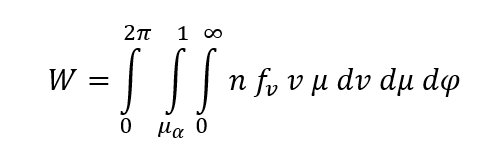

###Константы

In [2]:
k = 1.38e-23
m = 1.67e-27

In [10]:
alpha = np.deg2rad(5)
v1 = 0
v2 = 30000
n = 1000

In [11]:
mu_alpha = np.cos(alpha)

###Функция распределения Максвелла

In [5]:
def maxwell_distribution(v, T, V_plasma, mu, gamma, phi):
  const = 4 * np.pi * (m / (2 * np.pi * k * T))**1.5

  cos_v_V_plasma = mu*np.cos(gamma) + np.sqrt(1-mu**2)*np.sin(gamma)*np.cos(phi)

  exp = np.exp(-m*(v**2 + V_plasma**2 - 2*v*V_plasma*cos_v_V_plasma)/(2*k*T))

  f = v**2 * const * exp

  return f

In [6]:
def maxwell_integrand(v, T, V_plasma, mu, gamma, phi):
    return n * maxwell_distribution(v, T, V_plasma, mu, gamma, phi) * v * mu

###Метод Симпсона

In [7]:
def simpson_method(f, a, b, n):
    if n % 2 != 0:
        n += 1

    h = (b - a) / n

    integral = f(a) + f(b)

    for i in range(1, n):
        x_i = a + i * h

        if i % 2 == 0:
            integral += 2 * f(x_i)
        else:
            integral += 4 * f(x_i)

    return integral * h / 3

###Определение максимального значения скорости частиц

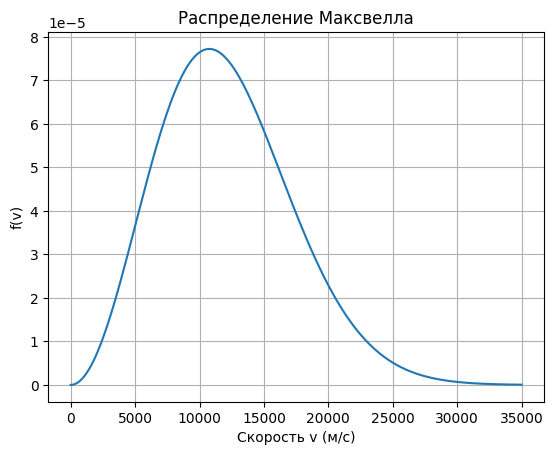

In [13]:
v_range = np.linspace(0, 35000, 200)
f_values = maxwell_distribution(v_range, 7000, 8, 1, 1, 0)
plt.plot(v_range, f_values)
plt.xlabel("Скорость v (м/с)")
plt.ylabel("f(v)")
plt.title("Распределение Максвелла")
plt.grid(True)
plt.show()

###Расчёт значения ионного потока

In [14]:
def calculate_ion_flow(T, V_plasma, gamma):
    num_intervals_v = 1000
    num_intervals_mu = 1000
    num_intervals_phi = 1000

    # Интегрирование от v1 до v2
    flow_v = simpson_method(lambda v: maxwell_integrand(v, T, V_plasma, 1, np.deg2rad(gamma), 1), v1, v2, num_intervals_v)

    # Интегрирование от mu_alpha до 1
    flow_mu = simpson_method(lambda mu: flow_v, mu_alpha, 1, num_intervals_mu)

    # Интегрирование от 0 до 2pi
    ion_flow = simpson_method(lambda phi: flow_mu, 0, 2*np.pi, num_intervals_phi)

    return ion_flow

###Результат расчётов

In [15]:
T_arr = [3000, 5000, 7000]
gamma_arr = [0, 10, 20, 30]
v_pl_arr = [6000, 7000, 8000]

In [16]:
results = {}
for v_pl in v_pl_arr:
    results[v_pl] = {}
    for T in T_arr:
        results[v_pl][T] = {}
        for gamma in gamma_arr:
            results[v_pl][T][gamma] = calculate_ion_flow(T, v_pl, gamma)

###Построение таблиц

In [17]:
for v_pl in results:
    print(f"{v_pl/1000} км/с")
    print(f"T/gamma | 0°           | 10°          | 20°          | 30°          |")
    for T in results[v_pl]:
        print(f"{T}    |", end="")
        for gamma in results[v_pl][T]:
            if (results[v_pl][T][gamma] < 1000000):
                print("  {0:10.4f} |".format(results[v_pl][T][gamma]), end="")
            else:
                print(" {0:11.4f} |".format(results[v_pl][T][gamma]), end="")
        print()
    print()

6.0 км/с
T/gamma | 0°           | 10°          | 20°          | 30°          |
3000    | 1290247.0800 | 1231834.7264 | 1074814.5077 |  863626.2756 |
5000    | 1140321.3883 | 1102789.0413 |  999129.6985 |  852222.8874 |
7000    | 1072402.7333 | 1043940.4353 |  964198.8965 |  848015.0860 |

7.0 км/с
T/gamma | 0°           | 10°          | 20°          | 30°          |
3000    | 1673236.1695 | 1580925.3444 | 1338053.6104 | 1024656.5031 |
5000    | 1417265.1860 | 1360989.6482 | 1207834.9255 |  996890.9368 |
7000    | 1293463.4071 | 1252363.2899 | 1138504.0134 |  976208.1935 |

8.0 км/с
T/gamma | 0°           | 10°          | 20°          | 30°          |
3000    | 2139247.7581 | 1998501.7341 | 1636623.5408 | 1189910.5579 |
5000    | 1743772.9136 | 1662013.1508 | 1442923.3016 | 1150084.9490 |
7000    | 1546630.7604 | 1489044.1791 | 1331365.1702 | 1111659.3778 |



###Построение графиков

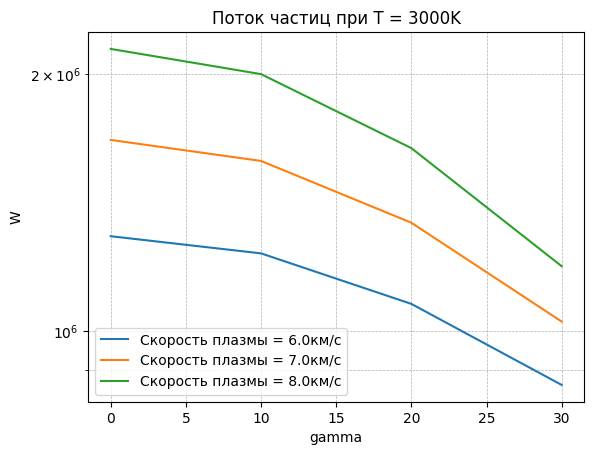

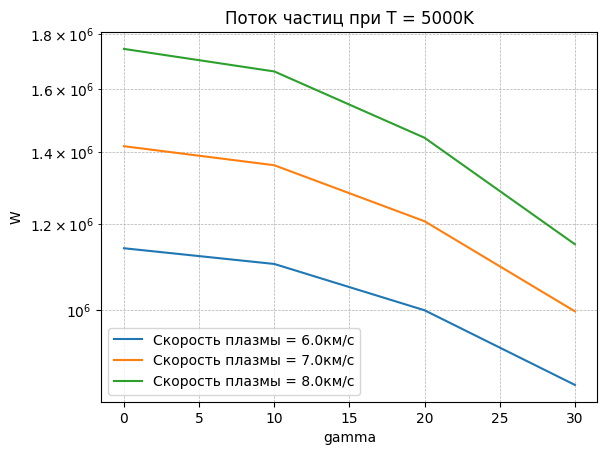

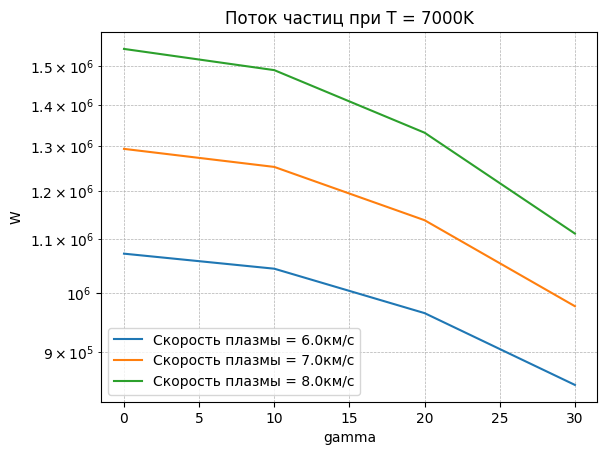

In [18]:
for T in T_arr:
    plt.figure()

    for v_pl in v_pl_arr:
        gammas = gamma_arr
        fluxes = [results[v_pl][T][gamma] for gamma in gamma_arr]
        plt.plot(gammas, fluxes, label=f"Скорость плазмы = {v_pl/1000}км/с")

    plt.xscale('linear')
    plt.yscale('log')
    plt.xlabel('gamma')
    plt.ylabel('W')
    plt.title(f'Поток частиц при T = {T}K')
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.legend()
    plt.show()

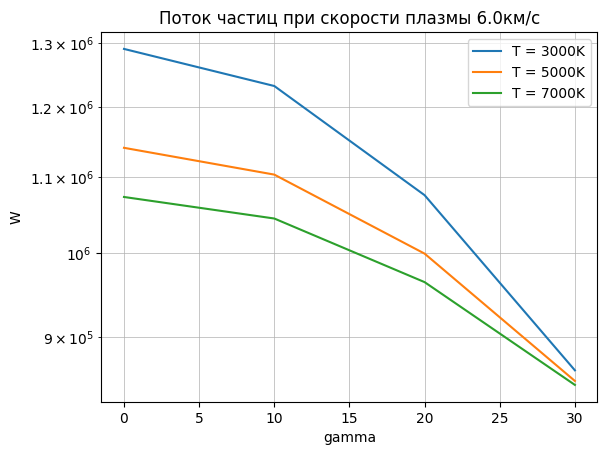

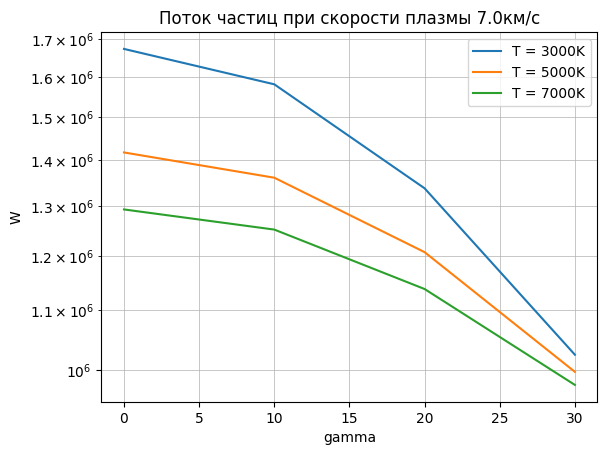

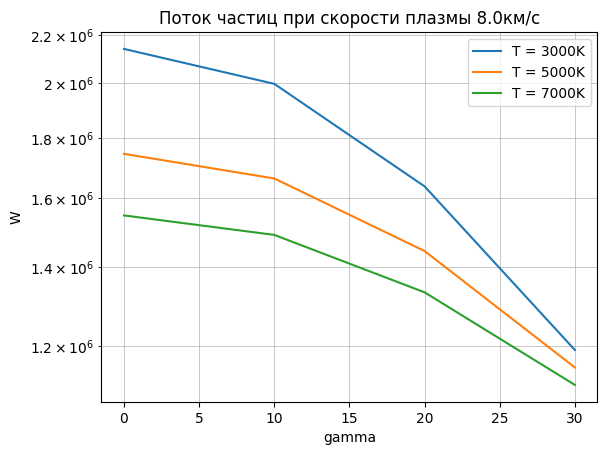

In [19]:
for v_pl in v_pl_arr:
    plt.figure()
    for T in T_arr:
        gammas = gamma_arr
        fluxes = [results[v_pl][T][gamma] for gamma in gamma_arr]
        plt.plot(gammas, fluxes, label=f"T = {T}K")

    plt.xscale('linear')
    plt.yscale('log')
    plt.xlabel('gamma')
    plt.ylabel('W')
    plt.title(f'Поток частиц при скорости плазмы {v_pl/1000}км/с')
    plt.grid(True, which="both", linestyle='-', linewidth=0.5)
    plt.legend()
    plt.show()